<a href="https://colab.research.google.com/github/Tahira2910/ETG_Python_Projects/blob/main/Pfizer_Vaccine_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/vaccination_tweets.csv")
print(data.head())
data.isnull().sum()
data = data.dropna()
print(data.describe())

import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)


text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

text = " ".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
data["user_verified"].value_counts()

nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())


x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# pre-trained model specifically designed for sentiment analysis(process of determining the sentiment or emotional tone, opinion, attitude expressed in a piece of text.) of social media texts.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# ImageColorGenerator--> It is used to generate color values for a WordCloud based on an input image.
# akes an image as input and generates colors based on the pixel values of the image.
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/vaccination_tweets.csv")
print(data.head())

                    id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405  

In [3]:
data.isnull().sum()

id                     0
user_name              0
user_location       1630
user_description     506
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
print(data.describe())

                 id  user_followers   user_friends  user_favourites  \
count  4.749000e+03    4.749000e+03    4749.000000      4749.000000   
mean   1.355333e+18    5.069683e+04    1341.396926     14523.124447   
std    1.280104e+16    3.545440e+05    3453.847283     36379.651961   
min    1.337728e+18    0.000000e+00       0.000000         0.000000   
25%    1.344929e+18    1.740000e+02     215.000000       497.000000   
50%    1.352030e+18    6.480000e+02     549.000000      2713.000000   
75%    1.364940e+18    2.728000e+03    1419.000000     12258.000000   
max    1.384788e+18    1.371493e+07  103226.000000    854011.000000   

          retweets    favorites  
count  4749.000000  4749.000000  
mean      1.545378     9.385555  
std      13.395572    55.280915  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     1.000000  
75%       1.000000     5.000000  
max     678.000000  1979.000000  


In [6]:

import nltk
import re
nltk.download('stopwords')
#  Stemming is the process of reducing words to their base or root form.
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
#  used in the clean() function to perform text cleaning and preprocessing.
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()              # This line converts the text to lowercase.
    text = re.sub('\[.*?\]', '', text)     # removes square brackets and their contents from the text.
    text = re.sub('https?://\S+|www\.\S+', '', text)    #  removes URLs (starting with 'http', 'https', or 'www') from the text.
    text = re.sub('<.*?>+', '', text)      #  removes HTML tags from the text.
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # removes punctuation marks from the text.
    text = re.sub('\n', '', text)         # removes newline characters from the line
    text = re.sub('\w*\d\w*', '', text)         # removes alphanumeric words that contain digits from the text.
    text = [word for word in text.split(' ') if word not in stopword]   #splits the text string into a list of words using a space (' ') as the delimiter.
    text=" ".join(text)    # joins the list of words back into a single string, where each word is separated by a space.
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)    # apply the clean() function to each element in the "text" column of the DataFrame data.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


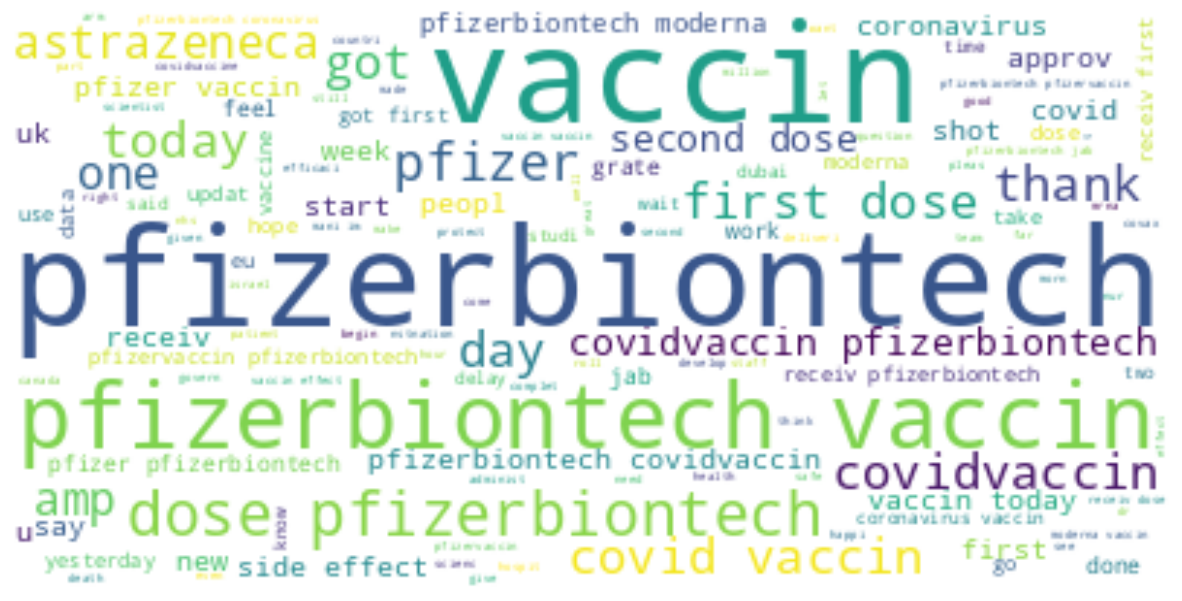

In [7]:

text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10)) #  width: 15, height: 10
plt.imshow(wordcloud, interpolation='bilinear')  #  the word cloud plot appears more visually appealing, with smoother transitions and better overall quality.
plt.axis("off")
plt.show()

word cloud of the hashtags column

In [8]:
data.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,folk said daikon past could treat cytokin stor...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,bit sad claim fame success vaccin patriot comp...,['vaccination'],Twitter Web App,0,4,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,covidvaccin state start get monday us say pak...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,death close mark million peopl wait pfizerbio...,"['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


In [9]:
print(data.columns)

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')


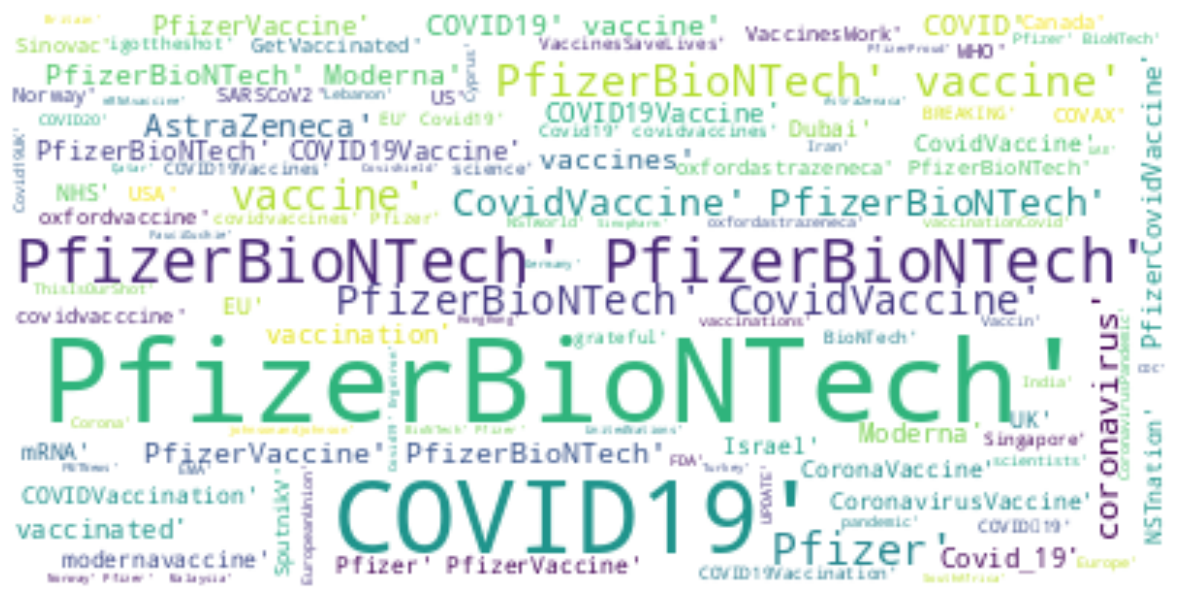

In [10]:

text = " ".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # removes the axis lines, tick marks, and labels from the plot
plt.show()

In [11]:
#  counts the occurrences of each unique value in the specified column
data["user_verified"].value_counts()

False    4169
True      580
Name: user_verified, dtype: int64

In [12]:

nltk.download('vader_lexicon') #  Vader--> sentiment analysis tool that is commonly used for analyzing sentiment in text data.
# pre-trained model specifically designed for sentiment analysis, to determine the sentiment polarity (positive, negative, or neutral) of a given text.
sentiments = SentimentIntensityAnalyzer()

# calculates the positive sentiment scores for each text in the "text" column of the data DataFrame
# It uses a list comprehension to iterate over each text, apply the polarity_scores() method of the
# sentiments object, and extract the positive score using the key "pos". The resulting scores are assigned to a new column called "Positive" in the data DataFrame.
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]

# adds them as separate columns in the DataFrame. The resulting DataFrame is then printed to display the text and sentiment scores for the first few entries.
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                 text  Positive  Negative  \
0   folk said daikon past could treat cytokin stor...     0.252     0.000   
2   coronavirus sputnikv astrazeneca pfizerbiontec...     0.000     0.000   
6   bit sad claim fame success vaccin patriot comp...     0.353     0.166   
9   covidvaccin state start get  monday us say pak...     0.000     0.000   
10  death close  mark million peopl wait pfizerbio...     0.000     0.302   

    Neutral  
0     0.748  
2     1.000  
6     0.481  
9     1.000  
10    0.698  


In [16]:

x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [18]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  417.81600000000003
Negative:  188.81200000000024
Neutral:  4142.3750000000055
